Found: D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR\Projectedband2Correlationfunction5CorrelationFunction.txt


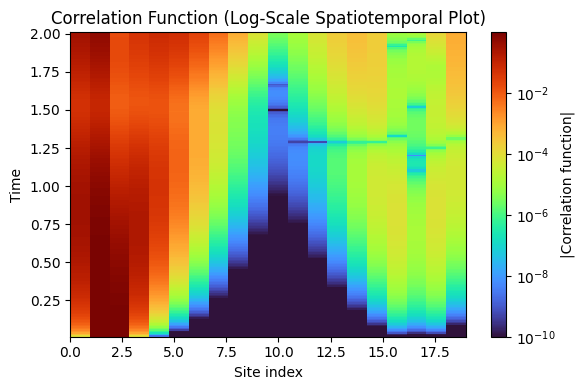

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os

base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"
filename = "Projectedband2Correlationfunction5CorrelationFunction.txt"
file_path = os.path.join(base_path, filename)

if not os.path.exists(file_path):
    print(f"{file_path} doesn't exist")
else:
    print(f"Found: {file_path}")

# Load data
data = np.loadtxt(file_path)
time = data[:, 0]
corr = data[:, 1:]   # shape (T, Nsites)

# corr_min = corr.min()
# corr_max = corr.max()
# corr_norm = (corr - corr_min) / (corr_max - corr_min)

# corr=corr_norm

# Use magnitude for log-scale
eps = 1e-10
corr_abs = np.abs(corr)
corr_clip = np.clip(corr_abs, eps, None)

plt.figure(figsize=(6,4))

im = plt.imshow(
    corr_clip,
    aspect="auto",
    origin="lower",
    cmap="turbo",
    interpolation="nearest",
    norm=mcolors.LogNorm(vmin=eps, vmax=np.nanmax(corr_clip)),
    extent=[0, corr_clip.shape[1]-1, time.min(), time.max()],
)

plt.colorbar(im, label="|Correlation function|")
plt.xlabel("Site index")
plt.ylabel("Time")
plt.title("Correlation Function (Log-Scale Spatiotemporal Plot)")
plt.tight_layout()
plt.show()


In [59]:
corr[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



# corr shape is (T, Nsites)
# time is shape (T,)
eps = 1e-10  # small floor to avoid log(0)

# Use magnitude for log-scale visualization
corr_abs = np.abs(corr)

plt.figure(figsize=(6,4))

im = plt.imshow(
    np.clip(corr_abs, eps, None),
    aspect="auto",
    origin="lower",
    cmap="turbo",
    norm=mcolors.LogNorm(
        vmin=eps,
        vmax=np.nanmax(corr_abs)
    ),
    extent=[0, corr_abs.shape[1], time.min(), time.max()],
    interpolation="nearest",     # <--- prevents blur
    rasterized=True
)

plt.colorbar(im, label="|Correlation| (log scale)")
plt.xlabel("Site index")
plt.ylabel("Time")
plt.title("Correlation Function (Log Scale)")
plt.tight_layout()
plt.show()


np.float64(2.0)

Fit slope = 0.475, intercept = -1.775


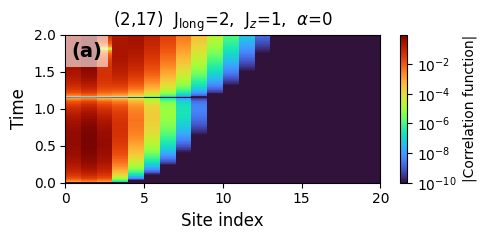

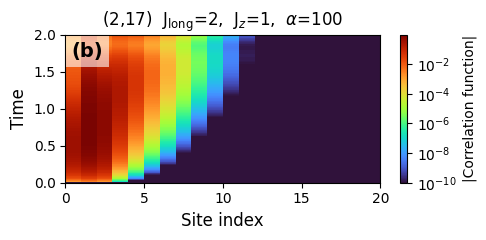

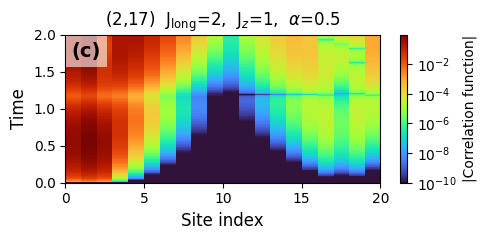

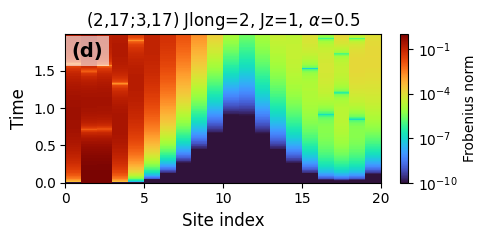

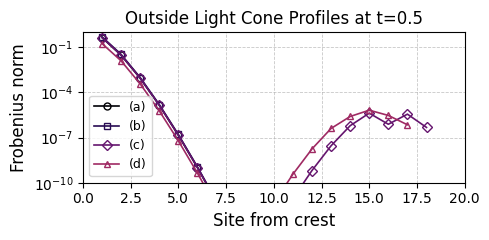

In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit

# -----------------------------
# Load Mathematica-style text files
# -----------------------------
def load_mathematica_data(filename):
    data = []
    with open(filename, "r") as f:
        for line in f:
            line = line.replace("*^", "e").strip().lstrip("{").rstrip("}")
            if not line:
                continue
            entries = line.split(",")
            row = []
            for e in entries:
                e = e.strip()
                if "+ 0." in e:
                    e = e.split("+")[0].strip()
                if "*I" in e:
                    continue
                try:
                    row.append(float(e))
                except ValueError:
                    pass
            if row:
                data.append(row)
    return np.array(data)

# -----------------------------
# Settings
# -----------------------------
# Jlong_values = np.array([0, 1, 3, 5, 10, 20, 30,50, 1000])
Jlong_values = np.array([4,7,5,100]) #
base_path = "src"
step_size = 0.01
steps_per_unit = 1 / step_size
time_for_profile = 0.5

os.makedirs("plt", exist_ok=True)

# Precompute consistent color scale
# all_max = 0
# for J in Jlong_values:
#     data = load_mathematica_data(os.path.join(base_path, f"B0LFIMb2lcfara05VaryNWscaling{Jlong_values}.txt"))
#     all_max = max(all_max, np.nanmax(data))
arrivals = [
    (4, 0.15), (5, 0.57), (6, 1.06), (7, 1.57)
]
x_points = np.array([a[0] for a in arrivals])   # site indices
y_points = np.array([a[1] for a in arrivals])   # times
# === Linear fit ===
fit_params = np.polyfit(x_points, y_points, 1)
fit_fn = np.poly1d(fit_params)
# x_fit = np.linspace(x_points.min(), x_points.max(), 200)
x_fit = np.linspace(3.9, 7.7, 200)
y_fit = fit_fn(x_fit)
titles = {
    1: r"(2,17)  J$_{\mathrm{long}}$=0,  J$_z$=0,  $\alpha$=0",
    2: r"(2,17)  J$_{\mathrm{long}}$=2,  J$_z$=0,  $\alpha$=0",
    3: r"(2,17)  J$_{\mathrm{long}}$=0,  J$_z$=1,  $\alpha$=0",
    4: r"(2,17)  J$_{\mathrm{long}}$=2,  J$_z$=1,  $\alpha$=0",
    5: r"(2,17)  J$_{\mathrm{long}}$=2,  J$_z$=1,  $\alpha$=0.5",
    6: r"(2,17)  J$_{\mathrm{long}}$=0,  J$_z$=1,  $\alpha$=0.5",
    7: r"(2,17)  J$_{\mathrm{long}}$=2,  J$_z$=1,  $\alpha$=100",
}


slope, intercept = fit_params
print(f"Fit slope = {slope:.3f}, intercept = {intercept:.3f}")
# -----------------------------
# Generate three heatmaps
# -----------------------------
for J in Jlong_values:
    file_path = os.path.join(base_path, f"Projectedband2CorrelationfunctionTest{J}.txt")
    raw_data = load_mathematica_data(file_path)
    n_steps = raw_data.shape[0]
    time_axis = np.arange(n_steps) / steps_per_unit
    t_min, t_max = time_axis.min(), time_axis.max()

    plt.figure(figsize=(5, 2.5))
    vmax_raw = np.nanmax(raw_data)
    vmax_safe = max(vmax_raw, 1.00001e-10)  # ensures LogNorm is valid

    im = plt.imshow(
        np.clip(raw_data, 1e-11, None),
        aspect="auto",
        origin="lower",
        cmap="turbo",
        norm=mcolors.LogNorm(vmin=1e-10, vmax=vmax_safe),
        interpolation="nearest",
        extent=[0, raw_data.shape[1], t_min, t_max],
        rasterized=True
    )

    # # Overlay first arrival points
    # plt.plot(x_points, y_points, 'wo', markersize=7,
    #         markeredgecolor="k", label="First arrivals")

    # # Overlay best-fit line
    # plt.plot(x_fit, y_fit, 'k--', linewidth=2, label="Linear fit")

    label_dict = {j: f"({chr(96 + i)})" for i, j in enumerate(Jlong_values, start=1)}
    label = label_dict.get(J, "(?)")


    plt.text(
        0.02, 0.95, label,
        transform=plt.gca().transAxes,
        fontsize=14, fontweight="bold",
        va="top", ha="left",
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none")
    )

    
    plt.xlabel("Site index", fontsize=12)
    plt.ylabel("Time", fontsize=12)
    plt.xlim(0, 20)
    
    

    if J == 100:
        plt.title(fr"(2,17;3,17) Jlong=2, Jz=1, $\alpha$={0.5}", fontsize=12)
        plt.colorbar(im, label="Frobenius norm")
    else:
        plt.title(titles[J], fontsize=12)
        plt.colorbar(im, label="|Correlation function|")
    plt.tight_layout()
    plt.savefig(f"plt/Heatmap_correlation_function{J}.svg", dpi=600)
    plt.show()


# -----------------------------
# Profiles overlayed on one plot + global fit
# -----------------------------
plt.figure(figsize=(5, 2.5))

# Six shades that darken as α increases (use perceptually uniform colormap)
cmap = plt.cm.inferno
colors = [cmap(i / 7) for i in range(0,7)]

# Six distinct markers
markers = ["o", "s", "D", "^", "v", "x", "p", "*", "h", "+", "1", ">"]


all_x_fit, all_y_fit = [], []

# Jlong_values here encode α×10 (e.g., 0,5,10,...,1000 -> α=0.0,...,1.0)
for (J, c, m) in zip(Jlong_values, colors, markers):
    file_path = os.path.join(base_path, f"Projectedband2CorrelationfunctionTest{J}.txt")
    if not os.path.exists(file_path):
        print(f"Warning: {file_path} not found, skipping.")
        continue

    raw_data = load_mathematica_data(file_path)
    n_steps = raw_data.shape[0]
    t_index = min(int(time_for_profile * steps_per_unit), n_steps - 1)
    profile = raw_data[t_index, 2:]
    if J==100:
        profile=raw_data[t_index,3:]
    sites = np.arange(1, profile.size + 1)
    mask = profile > 1e-14
    sites, profile = sites[mask], profile[mask]

    # Collect points for global fit
    n_fit = 5
    all_x_fit.extend(sites[:n_fit])
    all_y_fit.extend(profile[:n_fit])

    # Proper label (remove b since it's fixed)
    if J == 100:
        label = label_dict[J]
    else:
        label = label_dict[J]

    # Connected lines with open markers and darkening color
    plt.semilogy(
        sites, profile, '-', marker=m,
        markerfacecolor='none',
        markeredgecolor=c,
        color=c,
        markersize=5,
        linewidth=1.2,
        label=label
    )

# -----------------------------
# Global exponential fit
# -----------------------------
def log_model(x, logA, a, p):
    return logA - a * (x ** p)

x_fit_points = np.array(all_x_fit)
y_fit_points = np.array(all_y_fit)
mask = y_fit_points > 1e-14
x_fit_points, y_fit_points = x_fit_points[mask], y_fit_points[mask]

popt, _ = curve_fit(log_model, x_fit_points, np.log(y_fit_points),
                    p0=(np.log(y_fit_points.max()), 0.01, 2.0))
logA_fit, a_fit, p_fit = popt
A_fit = np.exp(logA_fit)

# # Global fit line
# x_dense = np.linspace(1, 10, 300)
# y_dense = A_fit * np.exp(-a_fit * x_dense ** p_fit)
# plt.semilogy(
#     x_dense, y_dense, "k--", linewidth=1.8,
#     label=fr"Fit: $A e^{{-{a_fit:.2f}x^{{{p_fit:.2f}}}}}$"
# )

# -----------------------------
# Formatting
# -----------------------------
plt.ylim(1e-10, 1)
plt.xlim(0, 20)
plt.xlabel("Site from crest", fontsize=12)
plt.ylabel("Frobenius norm", fontsize=12)
plt.title(f"Outside Light Cone Profiles at t={time_for_profile}", fontsize=12)
plt.grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.7)
plt.legend(fontsize=9, loc="lower left", ncol=1)
plt.tight_layout()
plt.savefig("plt/CorrelationVaryalpha2.svg", dpi=600)
plt.show()



In [5]:
label_dict[1]

'(a)'

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit

# -----------------------------
# Load Mathematica-style text files
# -----------------------------
def load_mathematica_data(filename):
    data = []
    with open(filename, "r") as f:
        for line in f:
            line = line.replace("*^", "e").strip().lstrip("{").rstrip("}")
            if not line:
                continue
            entries = line.split(",")
            row = []
            for e in entries:
                e = e.strip()
                if "+ 0." in e:
                    e = e.split("+")[0].strip()
                if "*I" in e:
                    continue
                try:
                    row.append(float(e))
                except ValueError:
                    pass
            if row:
                data.append(row)
    return np.array(data)

# -----------------------------
# Settings
# -----------------------------
# Jlong_values = np.array([0, 1, 3, 5, 10, 20, 30,50, 1000])
Jlong_values = np.array([1,2,3,4,5,6,7]) #
base_path = "src"
step_size = 0.01
steps_per_unit = 1 / step_size
time_for_profile = 1

os.makedirs("plt", exist_ok=True)

# Precompute consistent color scale
# all_max = 0
# for J in Jlong_values:
#     data = load_mathematica_data(os.path.join(base_path, f"B0LFIMb2lcfara05VaryNWscaling{Jlong_values}.txt"))
#     all_max = max(all_max, np.nanmax(data))
arrivals = [
    (4, 0.15), (5, 0.57), (6, 1.06), (7, 1.57)
]
x_points = np.array([a[0] for a in arrivals])   # site indices
y_points = np.array([a[1] for a in arrivals])   # times
# === Linear fit ===
fit_params = np.polyfit(x_points, y_points, 1)
fit_fn = np.poly1d(fit_params)
# x_fit = np.linspace(x_points.min(), x_points.max(), 200)
x_fit = np.linspace(3.9, 7.7, 200)
y_fit = fit_fn(x_fit)




slope, intercept = fit_params
print(f"Fit slope = {slope:.3f}, intercept = {intercept:.3f}")
# -----------------------------
# Generate three heatmaps
# -----------------------------
for J in Jlong_values:
    file_path = os.path.join(base_path, f"Projectedband2CorrelationfunctionTest{J}.txt")
    raw_data = load_mathematica_data(file_path)
    n_steps = raw_data.shape[0]
    time_axis = np.arange(n_steps) / steps_per_unit
    t_min, t_max = time_axis.min(), time_axis.max()

    plt.figure(figsize=(5, 2.5))
    im = plt.imshow(
        np.clip(raw_data, 1e-11, None),
        aspect="auto",
        origin="lower",
        cmap="turbo",
        norm=mcolors.LogNorm(vmin=1e-10, vmax=np.nanmax(raw_data)),
        interpolation="nearest",
        extent=[0, raw_data.shape[1], t_min, t_max],
        rasterized=True
    )
    # # Overlay first arrival points
    # plt.plot(x_points, y_points, 'wo', markersize=7,
    #         markeredgecolor="k", label="First arrivals")

    # # Overlay best-fit line
    # plt.plot(x_fit, y_fit, 'k--', linewidth=2, label="Linear fit")

    label_dict = {j: f"({chr(96 + i)})" for i, j in enumerate(Jlong_values, start=1)}
    label = label_dict.get(J, "(?)")


    plt.text(
        0.02, 0.95, label,
        transform=plt.gca().transAxes,
        fontsize=14, fontweight="bold",
        va="top", ha="left",
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none")
    )

    
    plt.xlabel("Site index", fontsize=12)
    plt.ylabel("Time", fontsize=12)
    plt.xlim(0, 20)
    
    if J == 5:
        plt.title(fr"(2,17) Jlong=2, Jz=1, $\alpha$={0.5}", fontsize=12)
        plt.colorbar(im, label="|Correlation function|")
    if J == 25:
        plt.title(fr"(2,17,3) Jlong=2, Jz=1, $\alpha$={0.5}", fontsize=12)
        plt.colorbar(im, label="|Correlation function|")
    if J == 15:
        plt.title(fr"(2,17;3,17) Jlong=2, Jz=1, $\alpha$={0.5}", fontsize=12)
        plt.colorbar(im, label="Frobenius norm")
    plt.tight_layout()
    plt.savefig(f"plt/Heatmap_correlation_function{J}.svg", dpi=600)
    plt.show()


# -----------------------------
# Profiles overlayed on one plot + global fit
# -----------------------------
plt.figure(figsize=(5, 2.5))

# Six shades that darken as α increases (use perceptually uniform colormap)
cmap = plt.cm.inferno
colors = [cmap(i / 2) for i in range(0,2)]

# Six distinct markers
markers = ["o", "s", "D", "^", "v", "x", "p", "*", "h", "+", "1", ">"]


all_x_fit, all_y_fit = [], []

# Jlong_values here encode α×10 (e.g., 0,5,10,...,1000 -> α=0.0,...,1.0)
for (J, c, m) in zip(Jlong_values, colors, markers):
    file_path = os.path.join(base_path, f"Projectedband2Correlationfunction{J}.txt")
    if not os.path.exists(file_path):
        print(f"Warning: {file_path} not found, skipping.")
        continue

    raw_data = load_mathematica_data(file_path)
    n_steps = raw_data.shape[0]
    t_index = min(int(time_for_profile * steps_per_unit), n_steps - 1)
    profile = raw_data[t_index, 2:]
    if J == 5:
        profile = raw_data[t_index, 1:]
    sites = np.arange(1, profile.size + 1)
    mask = profile > 1e-14
    sites, profile = sites[mask], profile[mask]

    # Collect points for global fit
    n_fit = 5
    all_x_fit.extend(sites[:n_fit])
    all_y_fit.extend(profile[:n_fit])

    # Proper label (remove b since it's fixed)
    if J == 15:
        label = r"Frobenius norm"
    else:
        label = r"Correlation function"

    # Connected lines with open markers and darkening color
    plt.semilogy(
        sites, profile, '-', marker=m,
        markerfacecolor='none',
        markeredgecolor=c,
        color=c,
        markersize=5,
        linewidth=1.2,
        label=label
    )

# -----------------------------
# Global exponential fit
# -----------------------------
def log_model(x, logA, a, p):
    return logA - a * (x ** p)

x_fit_points = np.array(all_x_fit)
y_fit_points = np.array(all_y_fit)
mask = y_fit_points > 1e-14
x_fit_points, y_fit_points = x_fit_points[mask], y_fit_points[mask]

popt, _ = curve_fit(log_model, x_fit_points, np.log(y_fit_points),
                    p0=(np.log(y_fit_points.max()), 0.01, 2.0))
logA_fit, a_fit, p_fit = popt
A_fit = np.exp(logA_fit)

# # Global fit line
# x_dense = np.linspace(1, 10, 300)
# y_dense = A_fit * np.exp(-a_fit * x_dense ** p_fit)
# plt.semilogy(
#     x_dense, y_dense, "k--", linewidth=1.8,
#     label=fr"Fit: $A e^{{-{a_fit:.2f}x^{{{p_fit:.2f}}}}}$"
# )

# -----------------------------
# Formatting
# -----------------------------
plt.ylim(1e-10, 1)
plt.xlim(0, 20)
plt.xlabel("Site from crest", fontsize=12)
plt.ylabel("Frobenius norm", fontsize=12)
plt.title(f"Outside Light Cone Profiles at t={time_for_profile}", fontsize=12)
plt.grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.7)
plt.legend(fontsize=9, loc="lower left", ncol=1)
plt.tight_layout()
plt.savefig("plt/CorrelationVaryalpha2.svg", dpi=600)
plt.show()



Fit slope = 0.475, intercept = -1.775


ValueError: Invalid vmin or vmax

Error in callback <function _draw_all_if_interactive at 0x000002514ACE4860> (for post_execute), with arguments args (),kwargs {}:


ValueError: Invalid vmin or vmax

ValueError: Invalid vmin or vmax

<Figure size 500x250 with 2 Axes>